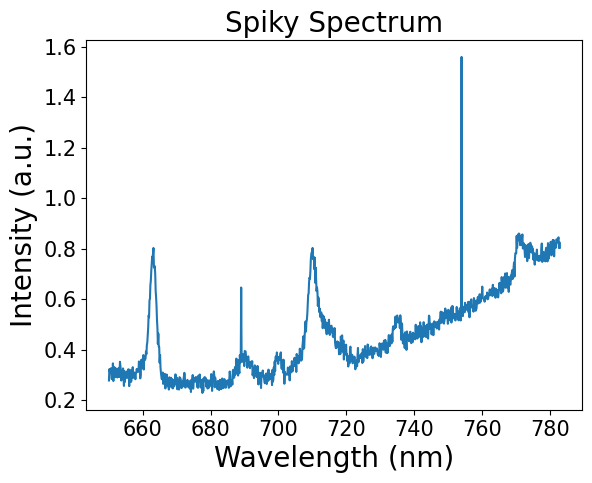

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data as data frame
df = pd.read_csv('/kaggle/input/synthetic-noise/several_spectra_noise.csv', delimiter=',')

# Transform data to numpy arrays
wavelength = np.array(df.Wavelength)
intensity = np.array(df.Intensity)

# Plot spiky spectra
plt.plot(wavelength, intensity)
plt.title('Spiky Spectrum', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Intensity (a.u.)', fontsize=20)
plt.show()

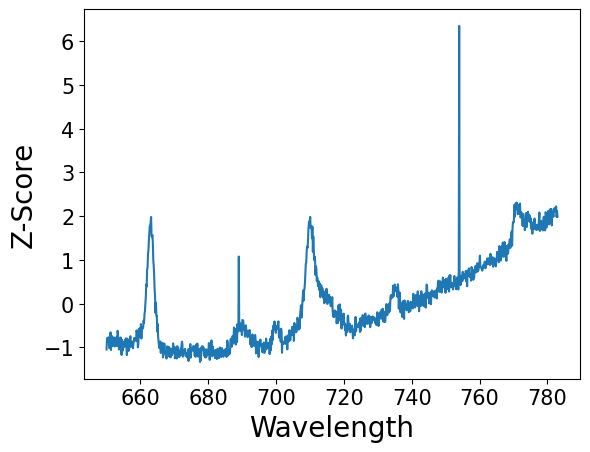

In [2]:
# Calculate z-score (mean & SD)
def z_score(intensity):
 mean_int = np.mean(intensity)
 std_int = np.std(intensity)
 z_scores = (intensity-mean_int) / std_int
 return z_scores
intensity_z_score = np.array(z_score(intensity))

# Plot z-score
plt.plot(wavelength, intensity_z_score)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength', fontsize = 20)
plt.ylabel('Z-Score', fontsize = 20)
plt.show()

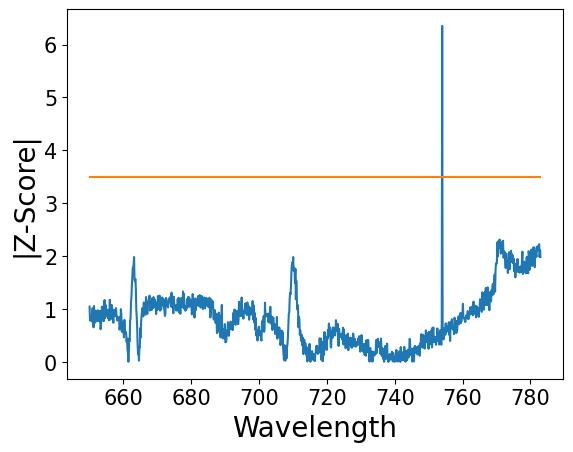

In [3]:
# Calculate z-score with threshold
# Typical threshold value: 3.5 (value is an outlier or not) 
def z_score(intensity):
 mean_int = np.mean(intensity)
 std_int = np.std(intensity)
 z_scores = (intensity-mean_int) / std_int
 return z_scores
threshold = 3.5
intensity_z_score = np.array(abs(z_score(intensity)))

# Plot z-score spectra with threshold
plt.plot(wavelength, intensity_z_score)
plt.plot(wavelength, threshold*np.ones(len(wavelength)), label = 'threshold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength', fontsize = 20)
plt.ylabel('|Z-Score|',fontsize = 20)
plt.show()

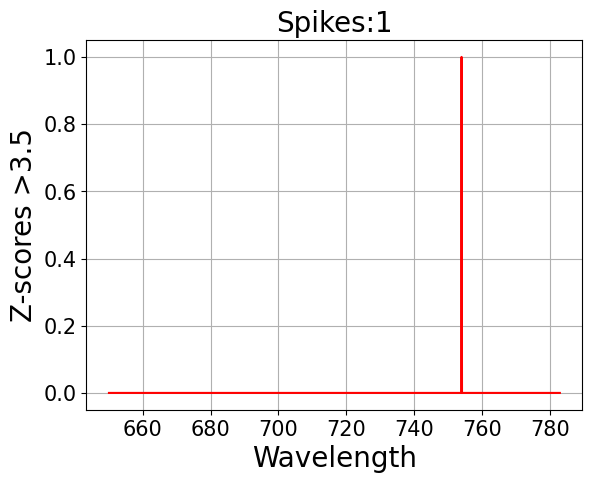

In [4]:
# Plot spikes detected with threshold
# 1 = spikes, 0 = non-spikes
threshold = 3.5
spikes = abs(np.array(z_score(intensity))) > threshold
plt.plot(wavelength, spikes, color = 'red')
plt.title('Spikes:' + str(np.sum(spikes)), fontsize = 20)
plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength', fontsize = 20)
plt.ylabel('Z-scores >' + str(threshold) ,fontsize = 20)
plt.show()